In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib

In [3]:
df=pd.read_csv('loan-train.csv')
df.head()
df.index
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()
df.select_dtypes(include='object').nunique()
df.describe()
df.isnull().sum()
df.isnull().sum()*100/len(df)
df[df['Married'].isna()]
df.loc[104:105,['Married']]= 'Yes'
df.loc[228:229,['Married']]= 'No'
df.loc[435:436,['Married']]= 'No'
df[df['Dependents'].isna()]
df['Dependents'].fillna(value=0,inplace=True)
df['Loan_Amount_Term'].value_counts()
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(value=360)
df[df['Gender'].isnull()]
df['Gender']=df['Gender'].fillna(value='Male')
df['Self_Employed']=df['Self_Employed'].fillna(value='No')
df['Credit_History']=df['Credit_History'].fillna(value=1)
df.dropna(inplace=True)
df.isnull().sum()
df['Dependents']=df['Dependents'].replace(to_replace='3+',value='4')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


KeyError: "['Loan_ID'] not found in axis"

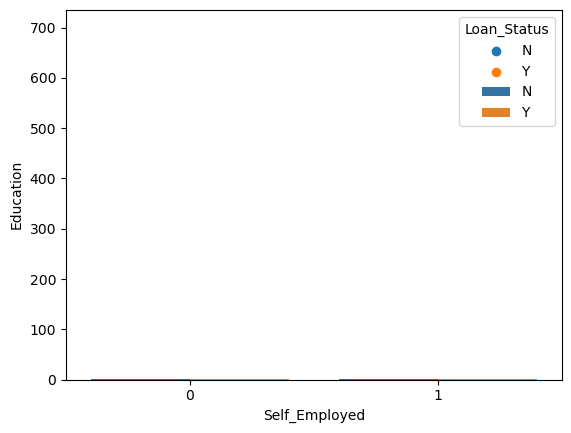

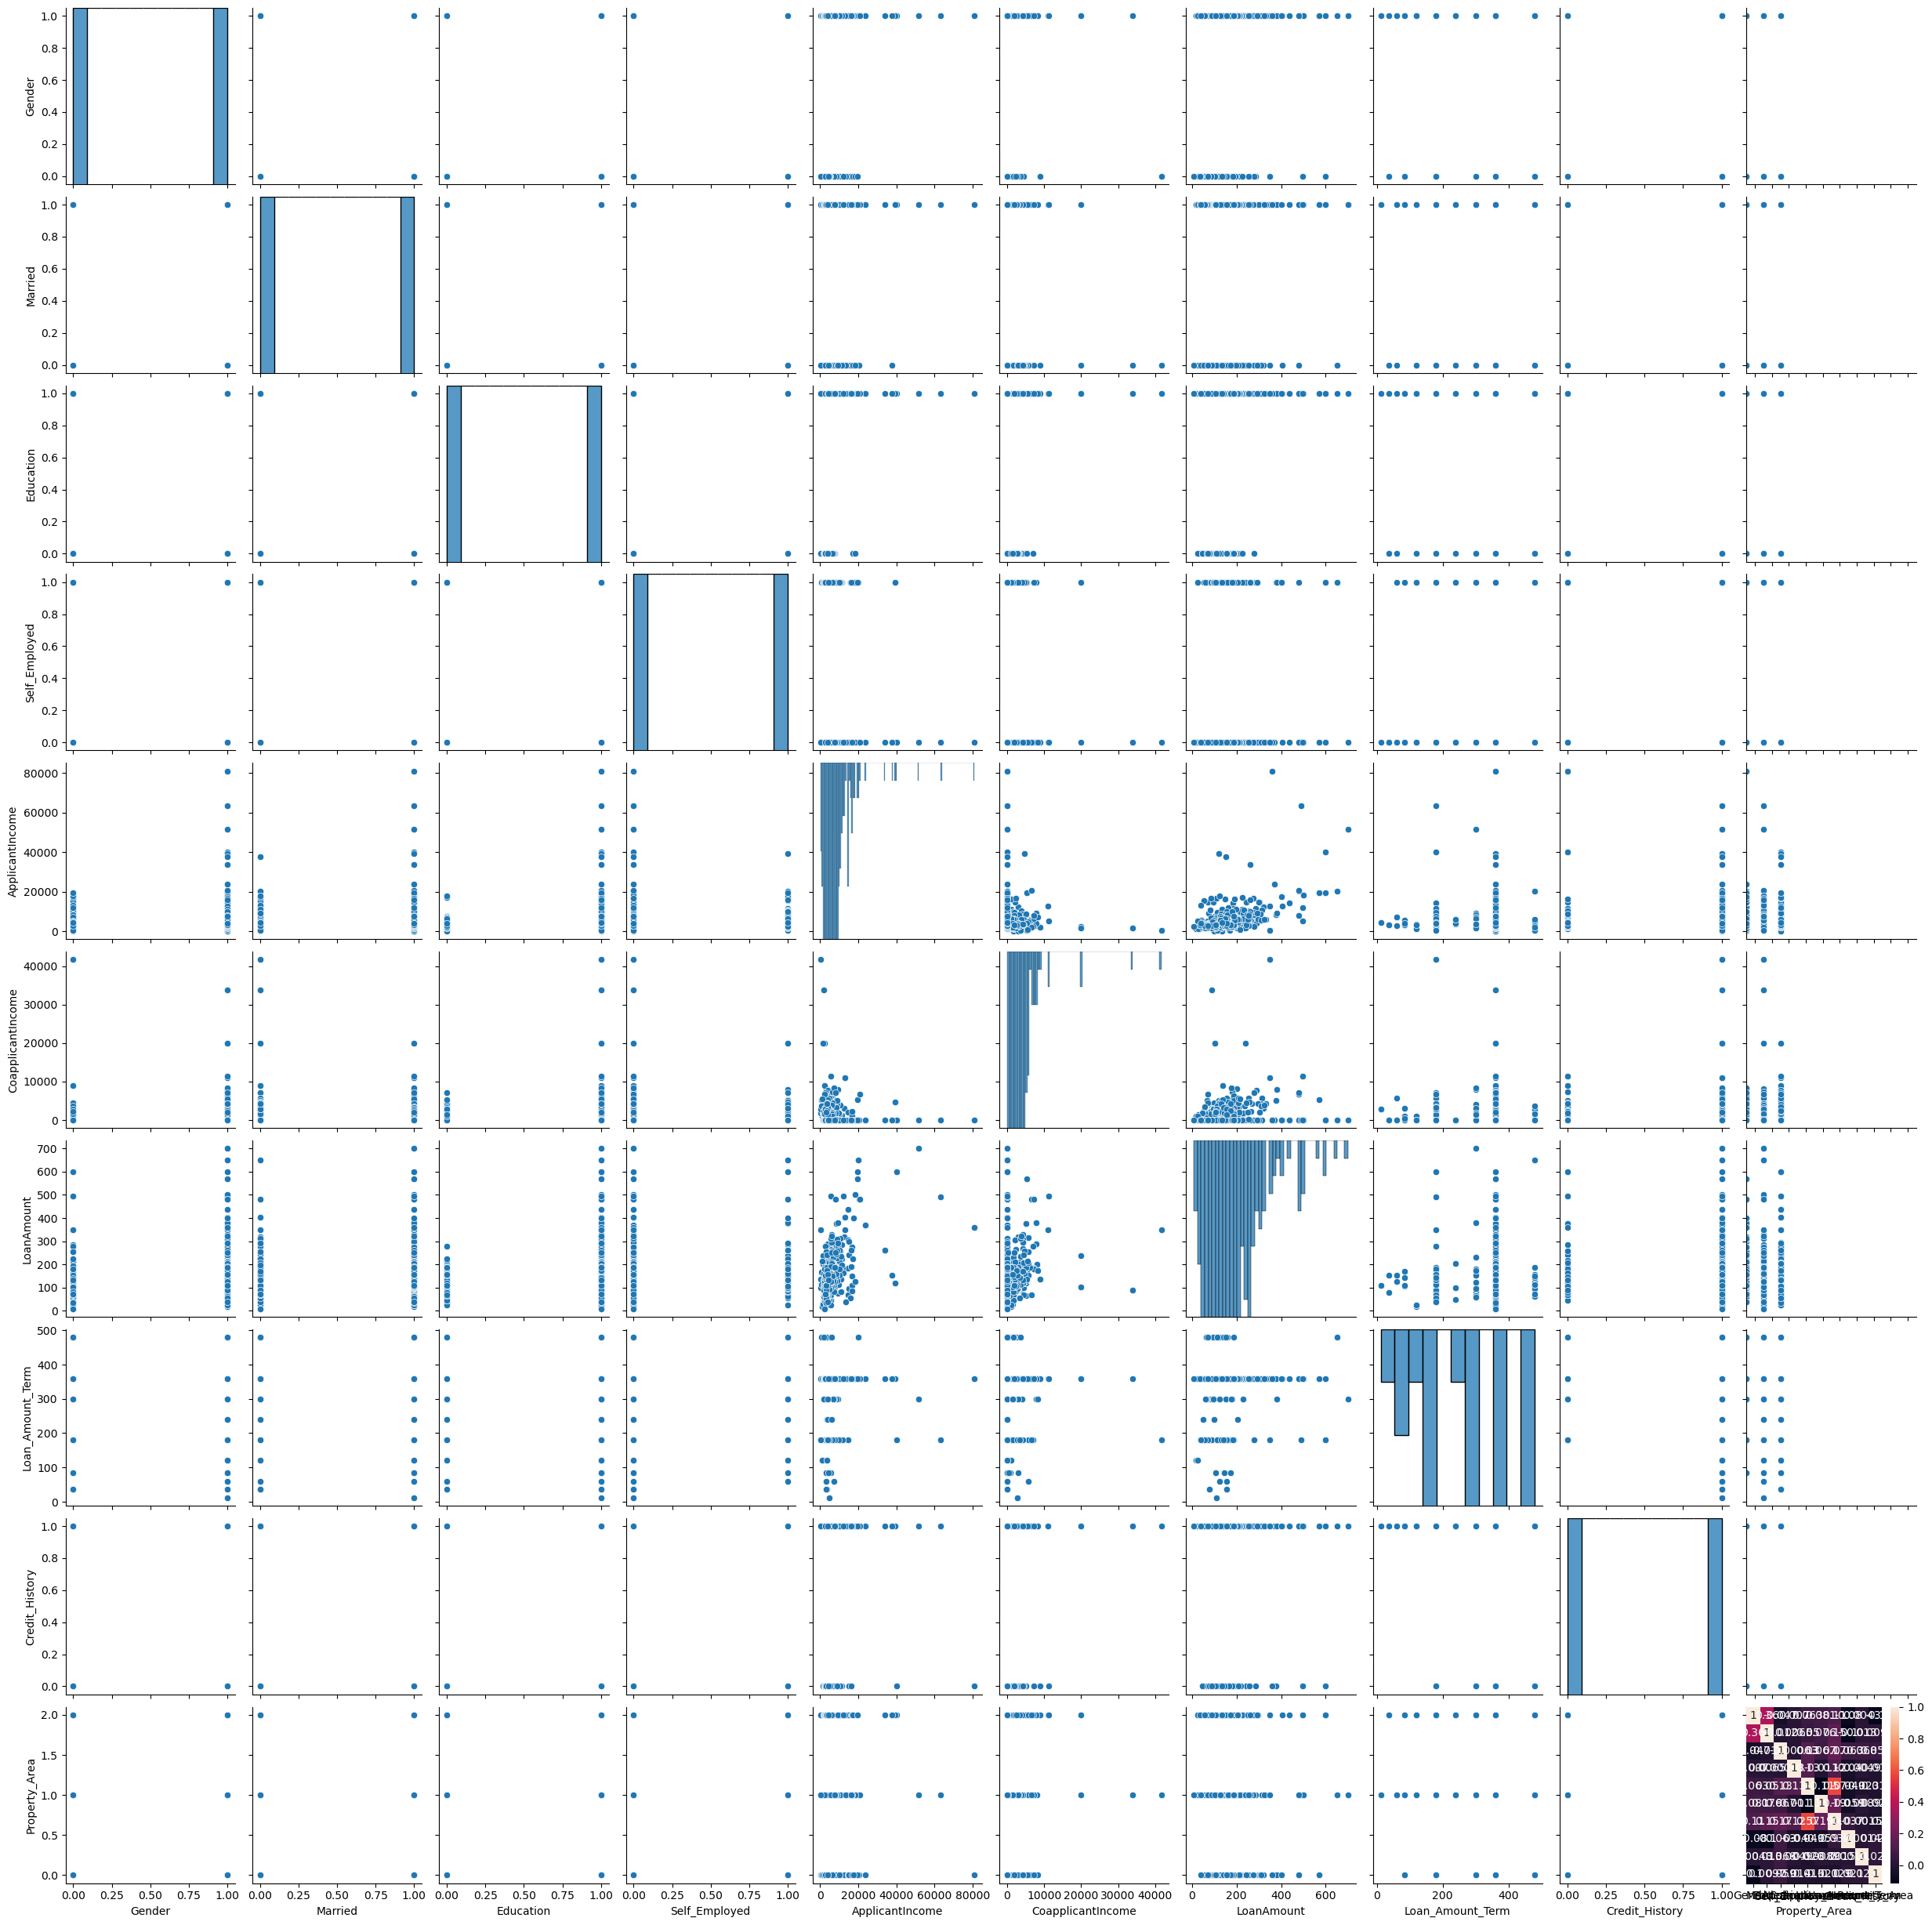

In [12]:
sns.histplot(x=df['LoanAmount'])
sns.scatterplot(x=df['ApplicantIncome'],y=df['LoanAmount'],hue=df['Loan_Status'])
sns.barplot(x=df['Self_Employed'],y=df['Education'],hue=df['Loan_Status'])
sns.pairplot(df)
sns.heatmap(df.corr(),annot=True)
df=df.drop('Loan_ID',axis=1)
df['Gender']=df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married']=df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area']=df['Property_Area'].map({'Urban':1,'Rural':0,'Semiurban':2})
astype('int')
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0}).astype('int')
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x[col])
x[col]=scalar.transform(x[col])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

NameError: name 'x' is not defined

In [11]:
svm=SVC(kernel='rbf',gamma='scale')
svm.fit(x_train,y_train)
tested_svm=svm.predict(x_test)
score_svm=accuracy_score(y_test,tested_svm)

NameError: name 'x_train' is not defined

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
tested_knn=knn.predict(x_test)
score_knn=accuracy_score(y_test,tested_knn)
print(score_knn)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
scalar=StandardScaler()
scalar.fit(x[col])
x[col]=scalar.transform(x[col])
Importing algorithm packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
18
tested_knn=knn.predict(x_test)
score_knn=accuracy_score(y_test,tested_knn)
print(score_knn)
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
tested_rfc=rfc.predict(x_test)
score_rfc=accuracy_score(y_test,tested_rfc)
print(score_rfc)

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
tested_dtc=dtc.predict(x_test)
score_dtc=accuracy_score(y_test,tested_dtc)
print(score_dtc)

In [ ]:
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(x_train,y_train)
tested_abc=abc.predict(x_test)
score_abc=accuracy_score(y_test,tested_abc)
print(score_abc)

In [ ]:
X=df.drop('Loan_Status',axis=1)
Y=df['Loan_Status']
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(X,Y)
joblib.dump(abc,'loan_prediction')
model=joblib.load('loan_prediction')
import pandas as pd
s=pd.DataFrame({
 'Gender':1,
 'Married':1,
 'Dependents':2,
 'Education':0,
 'Self_Employed':0,
 'ApplicantIncome':2889,
 'CoapplicantIncome':0.0,
 'LoanAmount':45,
 'Loan_Amount_Term':180,
 'Credit_History':0,
 'Property_Area':1
},index=[0])
s
output=model.predict(s)
if output==1:
 print('loan approved') 
else:
 print('loan not approved')
from tkinter import *
import joblib
import pandas as pd
def show_entry():
 p1=float(e1.get())
 p2=float(e2.get())
 p3=float(e3.get())
 p4=float(e4.get())
 p5=float(e5.get())
 p6=float(e6.get())
 p7=float(e7.get())
 p8=float(e8.get())
 p9=float(e9.get())
 p10=float(e10.get())
 p11=float(e11.get())
 model=joblib.load('loan_prediction')
 p=pd.DataFrame({
 'Gender':p1,
 'Married':p2,
 'Dependents':p3,
 'Education':p4,
 'Self_Employed':p5,
 'ApplicantIncome':p6,
 'CoapplicantIncome':p7,
 'LoanAmount':p8,
 'Loan_Amount_Term':p9,
 'Credit_History':p10,
 'Property_Area':p11
 },index=[0])
 result=model.predict(p)
 if result==1:
 Label(master,text='Loan Approved').grid(row=31)
 else:
 Label(master,text='Loan Not Approved').grid(row=31)
 master=Tk()
master.title("LOAN PREDICTION")
label=Label(master,text='Loan Status 
Prediction',bg='black',fg='white').grid(row=0,columnspan=2)
Label(master,text = 'Gender [1:Male,0:Female]').grid(row=1)
Label(master,text = 'Married [1:Yes,0:No]').grid(row=2)
Label(master,text = 'Dependents [1,2,3,4]').grid(row=3)
Label(master,text = 'Education').grid(row=4)
Label(master,text = 'Self_Employed').grid(row=5)
Label(master,text = 'ApplicantIncome').grid(row=6)
Label(master,text = 'CoapplicantIncome').grid(row=7)
Label(master,text = 'LoanAmount').grid(row=8)
Label(master,text = 'Loan_Amount_Term').grid(row=9)
Label(master,text = 'Credit_History').grid(row=10)
Label(master,text = 'Property_Area').grid(row=11)
e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
Button(master,text='predict',command=show_entry).grid()
mainloop()